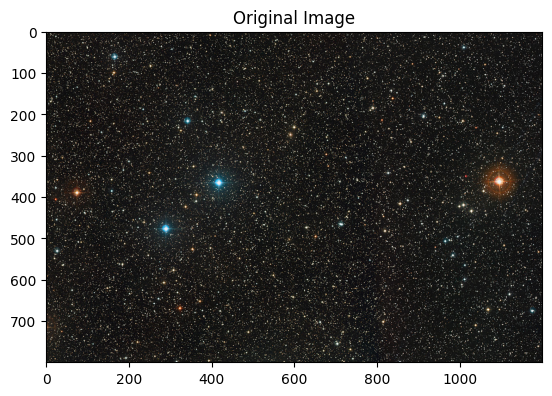

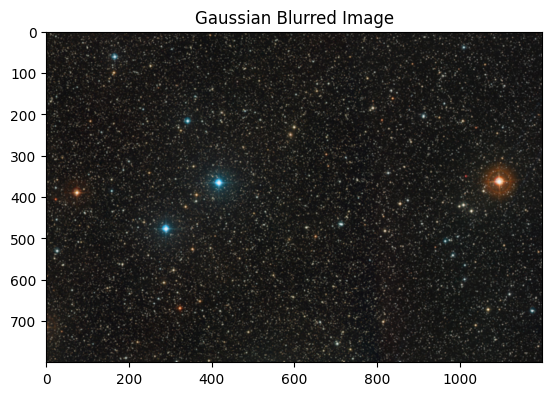

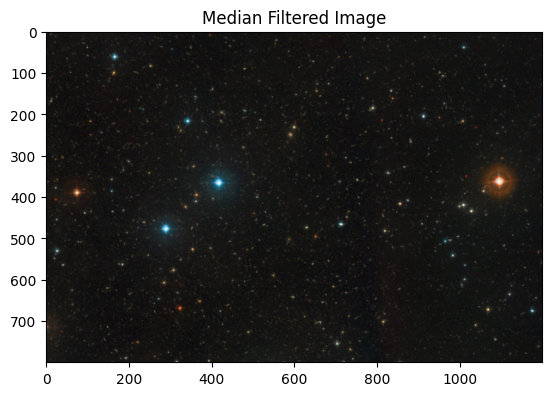

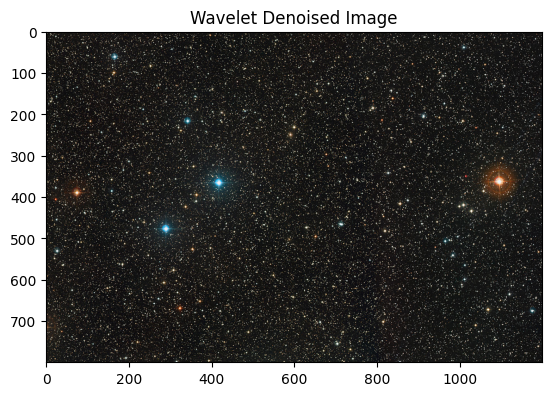

Gaussian Blur:
PSNR: 21.91, SSIM: 0.5917, MSE: 0.006435

Median Filter:
PSNR: 18.51, SSIM: 0.3895, MSE: 0.014086

Wavelet Denoising:
PSNR: 54.66, SSIM: 0.9994, MSE: 0.000003



In [ ]:
#task 1

import numpy as np
import pandas as pd
import os

import cv2
from skimage import io, restoration, metrics
from matplotlib import pyplot as plt

def load_image(path):
    image = io.imread(path)
    image = image.astype('float32') / 255.0  # Normalizing the image to [0, 1]
    return image


image_path = '/content/drive/MyDrive/ACV Lab/sky.png'
original_image = load_image(image_path)

plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Gaussian blur denoising
gaussian_blur = cv2.GaussianBlur(original_image, (5, 5), 0)

plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.show()

# Median filtering
median_filtered = cv2.medianBlur((original_image * 255).astype(np.uint8), 5)

plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.show()

# Wavelet denoising
wavelet_denoised = restoration.denoise_wavelet(original_image, method='BayesShrink', mode='soft')

plt.imshow(wavelet_denoised, cmap='gray')
plt.title('Wavelet Denoised Image')
plt.show()



def evaluate(original, denoised, name):
    psnr = metrics.peak_signal_noise_ratio(original, denoised, data_range=1.0)
    ssim = metrics.structural_similarity(original, denoised, data_range=1.0, win_size=3, channel_axis=None)
    mse = metrics.mean_squared_error(original, denoised)
    print(f"{name}:\nPSNR: {psnr:.2f}, SSIM: {ssim:.4f}, MSE: {mse:.6f}\n")

# Convert median filtered image back to float32 in [0,1] range for evaluation
median_filtered_norm = median_filtered.astype('float32') / 255.0

# Evaluate all methods
evaluate(original_image, gaussian_blur, 'Gaussian Blur')
evaluate(original_image, median_filtered_norm, 'Median Filter')
evaluate(original_image, wavelet_denoised, 'Wavelet Denoising')


In [5]:
#task 1

# importing the necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('/content/drive/MyDrive/ACV Lab/sample.mp4')

# Loop until the end of the video
while cap.isOpened():

    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("DONE")
        break  # Break the loop if frame not read properly

    # Resize the frame
    frame = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

    # Display the resulting frame
    cv2_imshow(frame)

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    Thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

    cv2_imshow(Thresh)

    # Exit if 'q' is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#gaussian blur

# importing the necessary libraries
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('/content/drive/MyDrive/ACV Lab/sample.mp4')


# Loop until the end of the video
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("DONE")
        break

    frame = cv2.resize(frame, (540, 380) ,interpolation = cv2.INTER_CUBIC)

    # Display the resulting frame
    cv2_imshow(frame)

    # using cv2.Gaussianblur() method to blur the video

    # (5, 5) is the kernel size for blurring.
    gaussianblur = cv2.GaussianBlur(frame, (5, 5), 0)
    cv2_imshow(gaussianblur)

    # define q as the exit button
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# release the video capture object
cap.release()

# Closes all the windows currently opened.
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#canny edge

# importing the necessary libraries
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('/content/drive/MyDrive/ACV Lab/sample.mp4')


# Loop until the end of the video
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("DONE")
        break

    frame = cv2.resize(frame, (540, 380),interpolation = cv2.INTER_CUBIC)

    # Display the resulting frame
    cv2_imshow(frame)

    # using cv2.Canny() for edge detection.
    edge_detect = cv2.Canny(frame, 100, 200)
    cv2_imshow(edge_detect)

    # define q as the exit button
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#bitwise not

# importing the necessary libraries
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('/content/drive/MyDrive/ACV Lab/sample.mp4')


# Loop until the end of the video
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("DONE")
        break

    frame = cv2.resize(frame, (540, 380), interpolation = cv2.INTER_CUBIC)

    # Display the resulting frame
    cv2_imshow(frame)

    # conversion of BGR to grayscale is necessary to apply this operation
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # apply NOT operation on image and mask generated by thresholding
    BIT = cv2.bitwise_not(frame, frame, mask = mask)
    cv2_imshow(BIT)

    # define q as the exit button
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# release the video capture object
cap.release()

# Closes all the windows currently opened.
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [3]:
import cv2
import os
import numpy as np

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Failed to open video.")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # output folder
    output_folder = "processed"
    os.makedirs(output_folder, exist_ok=True)


    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_thresh = cv2.VideoWriter(os.path.join(output_folder, 'adaptive_thresh.mp4'), fourcc, fps, (width, height), False)
    out_blur   = cv2.VideoWriter(os.path.join(output_folder, 'gaussian_blur.mp4'), fourcc, fps, (width, height), True)
    out_edges  = cv2.VideoWriter(os.path.join(output_folder, 'canny_edges.mp4'), fourcc, fps, (width, height), False)
    out_inv    = cv2.VideoWriter(os.path.join(output_folder, 'bitwise_not.mp4'), fourcc, fps, (width, height), True)

    collage_frames = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 1. Adaptive Thresholding
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

        # 2. Gaussian Smoothing
        blur = cv2.GaussianBlur(frame, (9, 9), 0)

        # 3. Canny Edge Detection
        edges = cv2.Canny(gray, 100, 200)

        # 4. Bitwise Not
        inv = cv2.bitwise_not(frame)


        out_thresh.write(thresh)
        out_blur.write(blur)
        out_edges.write(edges)
        out_inv.write(inv)


        if frame_count % 30 == 0:
            small = cv2.resize(frame, (200, 150))
            collage_frames.append(small)

        frame_count += 1

    cap.release()
    out_thresh.release()
    out_blur.release()
    out_edges.release()
    out_inv.release()

    print(f"{frame_count} frames processed.")


    make_collage(collage_frames)

def make_collage(frames, grid_size=(4, 4)):
    if not frames:
        print("No frames.")
        return

    rows, cols = grid_size
    collage = []
    for r in range(rows):
        row = []
        for c in range(cols):
            idx = r * cols + c
            if idx < len(frames):
                row.append(frames[idx])
            else:

                row.append(np.zeros_like(frames[0]))
        collage.append(np.hstack(row))
    final_collage = np.vstack(collage)

    cv2.imwrite("collage.jpg", final_collage)
    print("Collage is saved as 'collage_1.jpg'")

if __name__ == '__main__':
    video_path = "/content/drive/MyDrive/ACV Lab/sample.mp4"
    process_video(video_path)


17 frames processed.
Collage is saved as 'collage_1.jpg'
